In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.corr()

,Rebound Signal Strength nHz,Rock Density kg/m3
Rebound Signal Strength nHz,1.0000,-0.0306
Rock Density kg/m3,-0.0306,1.0000


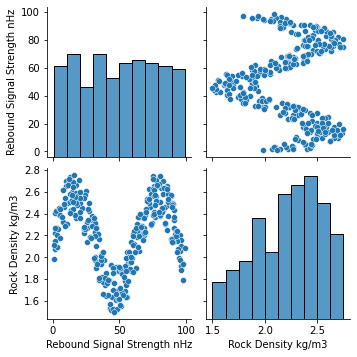

In [6]:
sns.pairplot(data=df)

In [7]:
df.columns=['Signal','Density']

In [8]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [9]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = lr_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_pred,y_test)
MSE = mean_squared_error(y_pred,y_test)
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))

In [14]:
MAE

0.211198973318633

In [15]:
RMSE

0.2570051996584629

In [16]:
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)

    preds=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(preds,y_test))
    mae=mean_absolute_error(preds,y_test)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')

    signal_range=np.arange(0,100)
    signal_preds=model.predict(signal_range.reshape(-1,1))

    plt.figure(figsize=(4,4),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')

    plt.plot(signal_range,signal_preds)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


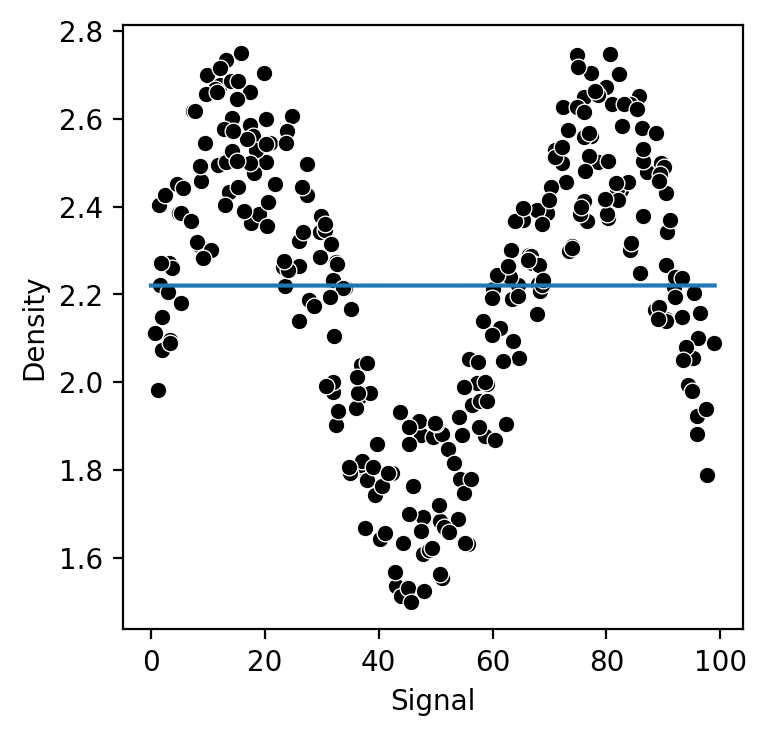

In [17]:
model=LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [23]:
pipe=make_pipeline(PolynomialFeatures(degree=10),LinearRegression())

MAE: 0.12478026429426053
RMSE: 0.14049911421019984


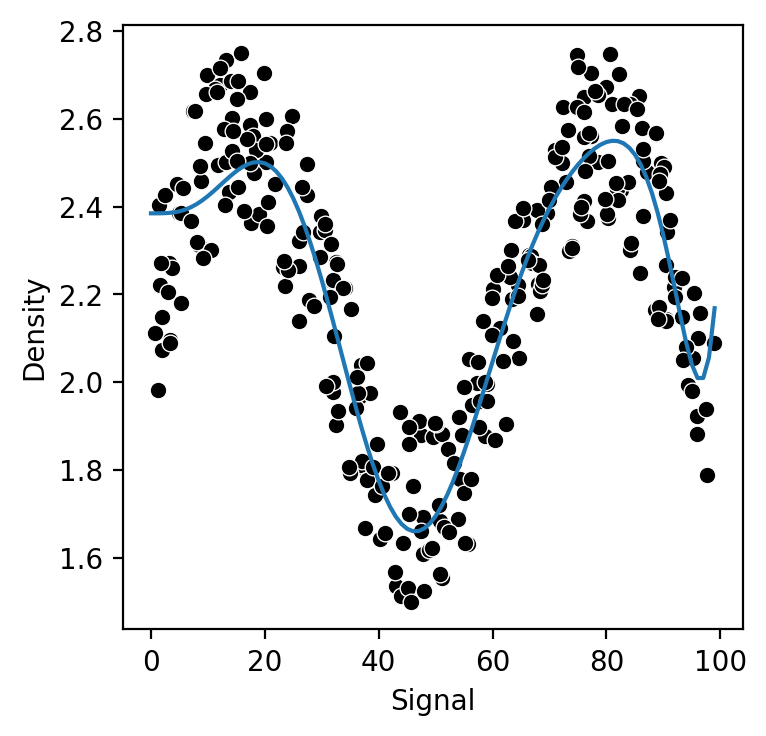

In [24]:
run_model(pipe,X_train,y_train,X_test,y_test)

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


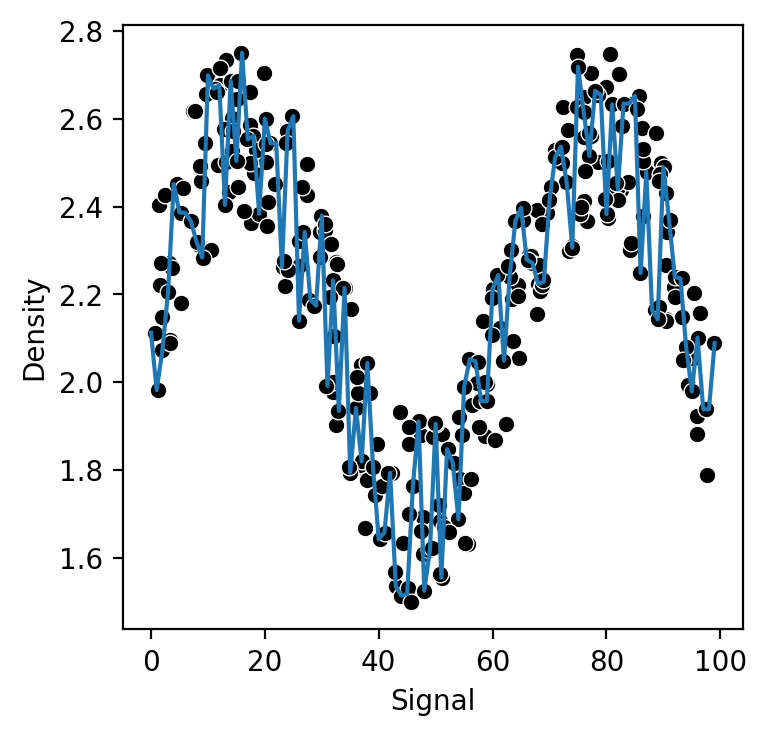

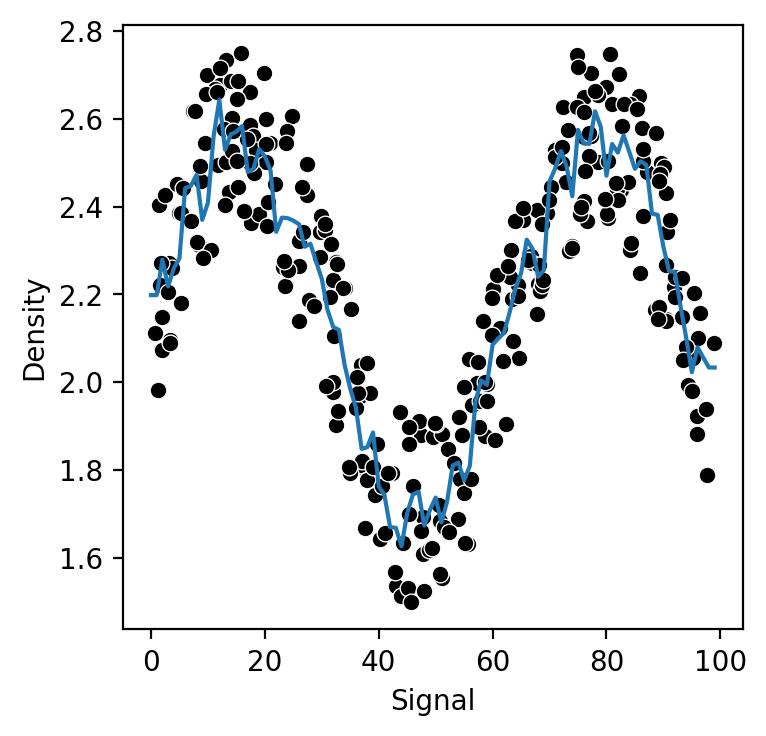

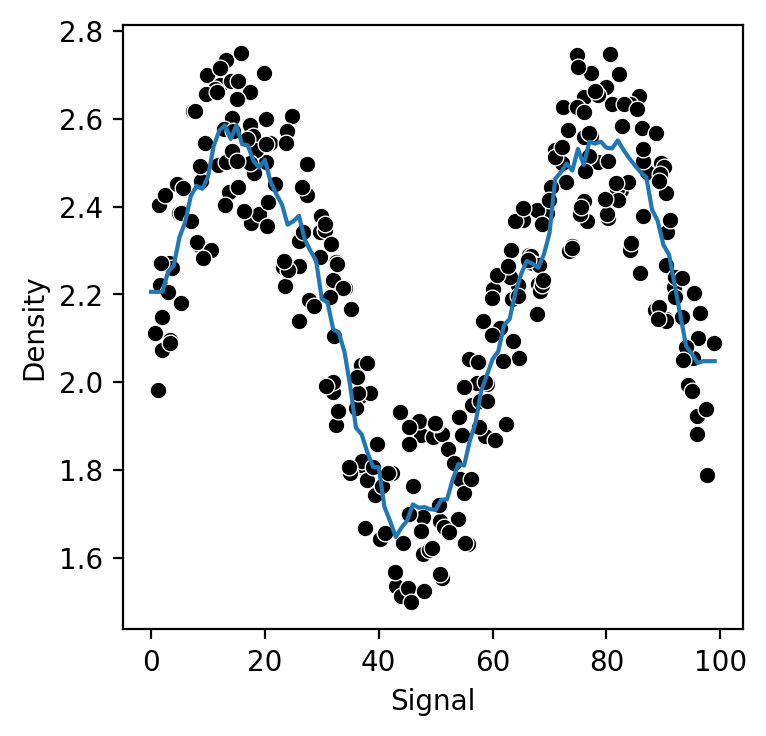

In [25]:
from sklearn.neighbors import KNeighborsRegressor
k_values=[1,5,10]

for n in k_values:
    model=KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


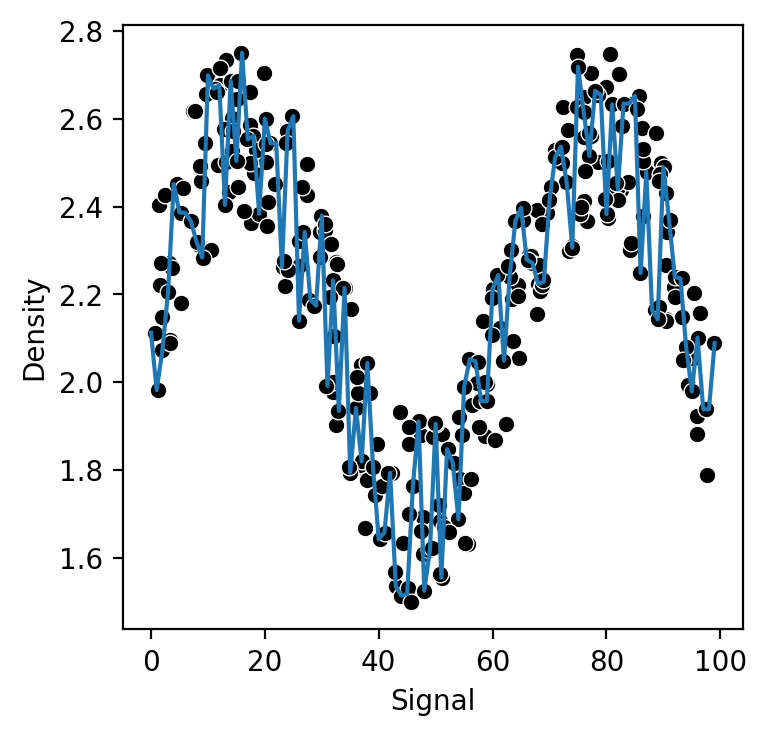

In [27]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


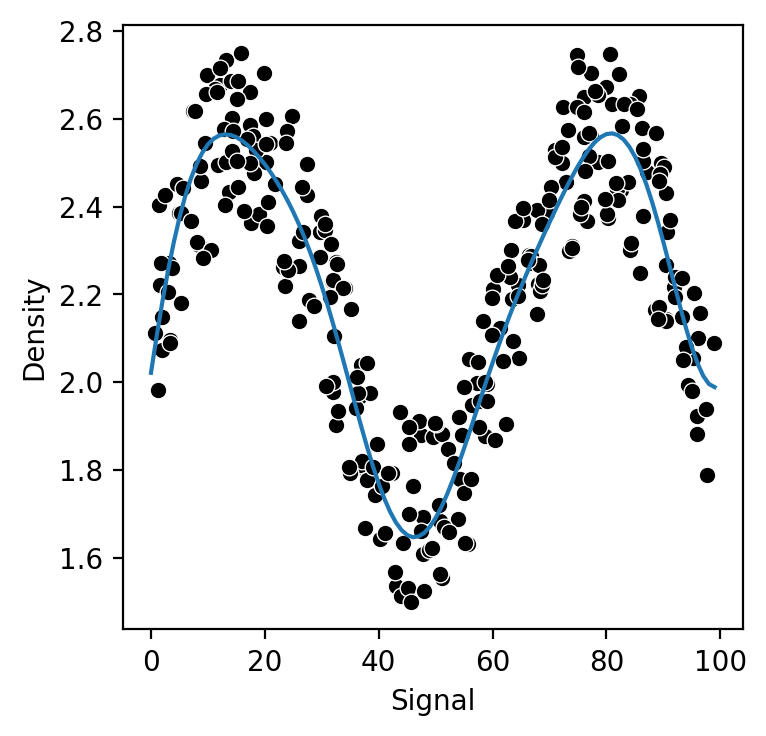

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid={'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,y_train,X_test,y_test)

MAE: 0.10640125597708566
RMSE: 0.13013939212067777


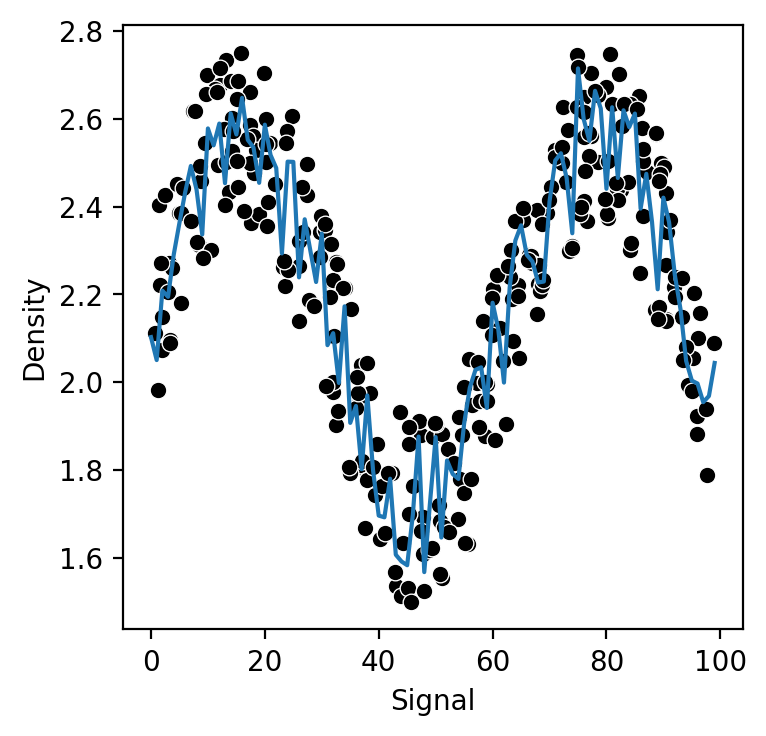

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10)
run_model(rfr,X_train,y_train,X_test,y_test)